In [ ]:
# HW 1
# Charles Wang
# ECGR-4106
# Problem 1:

In [30]:
import torch
import imageio
from PIL import Image
import torchvision.transforms as tranforms

In [34]:
img_red = imageio.imread("red.jpg")
img_green = imageio.imread("green.jpg")
img_blue = imageio.imread("blue.jpg")

In [36]:
# Turn into tensor
tensor_red_byte = torch.from_numpy(img_red).permute(2,0,1)
tensor_green_byte = torch.from_numpy(img_green).permute(2,0,1)
tensor_blue_byte = torch.from_numpy(img_blue).permute(2,0,1)
# Convert to float32 from byte otherwise torch.mean() will not work
tensor_red = tensor.new_tensor(tensor_red_byte, dtype=torch.float32)
tensor_green = tensor.new_tensor(tensor_green_byte, dtype=torch.float32)
tensor_blue = tensor.new_tensor(tensor_blue_byte, dtype=torch.float32)

/tmp/ipykernel_173846/380973703.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  tensor_red = tensor.new_tensor(tensor_red_byte, dtype=torch.float32)
/tmp/ipykernel_173846/380973703.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  tensor_green = tensor.new_tensor(tensor_green_byte, dtype=torch.float32)
/tmp/ipykernel_173846/380973703.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  tensor_blue = tensor.new_tensor(tensor_blue_byte, dtype=torch.float32)


In [44]:
# Means of each image
print(torch.mean(tensor_red))
print(torch.mean(tensor_green))
print(torch.mean(tensor_blue))

tensor(168.4717)
tensor(171.7436)
tensor(156.8283)


In [41]:
# Means of each channel for red image
tensor_red_only_red = tensor_red[0]
tensor_red_only_green = tensor_red[1]
tensor_red_only_blue = tensor_red[2]

print(torch.mean(tensor_red_only_red))
print(torch.mean(tensor_red_only_green))
print(torch.mean(tensor_red_only_blue))

tensor(172.9433)
tensor(167.3999)
tensor(165.0719)


In [42]:
# Means of each channel for green image
# Red channel of red image
tensor_green_only_red = tensor_green[0]
tensor_green_only_green = tensor_green[1]
tensor_green_only_blue = tensor_green[2]

print(torch.mean(tensor_green_only_red))
print(torch.mean(tensor_green_only_green))
print(torch.mean(tensor_green_only_blue))

tensor(172.6271)
tensor(175.0316)
tensor(167.5720)


In [43]:
# Means of each channel for blue image
# Red channel of red image
tensor_blue_only_red = tensor_blue[0]
tensor_blue_only_green = tensor_blue[1]
tensor_blue_only_blue = tensor_blue[2]

print(torch.mean(tensor_blue_only_red))
print(torch.mean(tensor_blue_only_green))
print(torch.mean(tensor_blue_only_blue))

tensor(153.1128)
tensor(157.3137)
tensor(160.0583)


In [45]:
# Problem 2

In [70]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [71]:
def model(t_u, w, b):
    return w * t_u + b

In [72]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [84]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [85]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [86]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [87]:
delta = 0.1
loss_rate_of_change_w = \
(loss_fn(model(t_u, w + delta, b), t_c) -
loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [88]:
learning_rate = 1e-2 #means 0.01 as the changing rate for our parameters.
w = w - learning_rate * loss_rate_of_change_w

In [89]:
loss_rate_of_change_b = \
(loss_fn(model(t_u, w, b + delta), t_c) -
loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [90]:
def dmodel_dw(t_u, w, b):
    return t_u

In [91]:
def dmodel_db(t_u, w, b):
    return 1.0

In [92]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [93]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        
        print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params
        

In [94]:
training_loop(
n_epochs = 100,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_u,
t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [95]:
training_loop(
n_epochs = 100,
learning_rate = 1e-4,
params = torch.tensor([1.0, 0.0]),
t_u = t_u,
t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

In [96]:
t_un = 0.1 * t_u

In [97]:
training_loop(
n_epochs = 100,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [99]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 532, Loss 7.351567
Epoch 533, Loss 7.336549
Epoch 534, Loss 7.321584
Epoch 535, Loss 7.306671
Epoch 536, Loss 7.291804
Epoch 537, Loss 7.276989
Epoch 538, Loss 7.262227
Epoch 539, Loss 7.247512
Epoch 540, Loss 7.232845
Epoch 541, Loss 7.218231
Epoch 542, Loss 7.203665
Epoch 543, Loss 7.189151
Epoch 544, Loss 7.174683
Epoch 545, Loss 7.160266
Epoch 546, Loss 7.145897
Epoch 547, Loss 7.131581
Epoch 548, Loss 7.117305
Epoch 549, Loss 7.103083
Epoch 550, Loss 7.088911
Epoch 551, Loss 7.074785
Epoch 552, Loss 7.060707
Epoch 553, Loss 7.046676
Epoch 554, Loss 7.032695
Epoch 555, Loss 7.018755
Epoch 556, Loss 7.004870
Epoch 557, Loss 6.991028
Epoch 558, Loss 6.977232
Epoch 559, Loss 6.963488
Epoch 560, Loss 6.949787
Epoch 561, Loss 6.936135
Epoch 562, Loss 6.922528
Epoch 563, Loss 6.908967
Epoch 564, Loss 6.895452
Epoch 565, Loss 6.881980
Epoch 566, Loss 6.868559
Epoch 567, Loss 6.855180
Epoch 568, Loss 6.841848
Epoch 569, Loss 6.828561
Epoch 570, Loss 6.815319
Epoch 571, Loss 6.802118


Epoch 1068, Loss 3.642559
Epoch 1069, Loss 3.640132
Epoch 1070, Loss 3.637711
Epoch 1071, Loss 3.635302
Epoch 1072, Loss 3.632902
Epoch 1073, Loss 3.630508
Epoch 1074, Loss 3.628119
Epoch 1075, Loss 3.625741
Epoch 1076, Loss 3.623374
Epoch 1077, Loss 3.621010
Epoch 1078, Loss 3.618659
Epoch 1079, Loss 3.616311
Epoch 1080, Loss 3.613973
Epoch 1081, Loss 3.611643
Epoch 1082, Loss 3.609321
Epoch 1083, Loss 3.607008
Epoch 1084, Loss 3.604701
Epoch 1085, Loss 3.602403
Epoch 1086, Loss 3.600114
Epoch 1087, Loss 3.597831
Epoch 1088, Loss 3.595553
Epoch 1089, Loss 3.593287
Epoch 1090, Loss 3.591030
Epoch 1091, Loss 3.588776
Epoch 1092, Loss 3.586534
Epoch 1093, Loss 3.584294
Epoch 1094, Loss 3.582067
Epoch 1095, Loss 3.579845
Epoch 1096, Loss 3.577631
Epoch 1097, Loss 3.575424
Epoch 1098, Loss 3.573225
Epoch 1099, Loss 3.571035
Epoch 1100, Loss 3.568848
Epoch 1101, Loss 3.566673
Epoch 1102, Loss 3.564506
Epoch 1103, Loss 3.562341
Epoch 1104, Loss 3.560185
Epoch 1105, Loss 3.558040
Epoch 1106, 

Epoch 1648, Loss 3.027122
Epoch 1649, Loss 3.026784
Epoch 1650, Loss 3.026447
Epoch 1651, Loss 3.026111
Epoch 1652, Loss 3.025780
Epoch 1653, Loss 3.025447
Epoch 1654, Loss 3.025114
Epoch 1655, Loss 3.024782
Epoch 1656, Loss 3.024452
Epoch 1657, Loss 3.024125
Epoch 1658, Loss 3.023796
Epoch 1659, Loss 3.023471
Epoch 1660, Loss 3.023145
Epoch 1661, Loss 3.022820
Epoch 1662, Loss 3.022498
Epoch 1663, Loss 3.022177
Epoch 1664, Loss 3.021855
Epoch 1665, Loss 3.021534
Epoch 1666, Loss 3.021217
Epoch 1667, Loss 3.020898
Epoch 1668, Loss 3.020582
Epoch 1669, Loss 3.020265
Epoch 1670, Loss 3.019952
Epoch 1671, Loss 3.019639
Epoch 1672, Loss 3.019325
Epoch 1673, Loss 3.019016
Epoch 1674, Loss 3.018706
Epoch 1675, Loss 3.018395
Epoch 1676, Loss 3.018089
Epoch 1677, Loss 3.017780
Epoch 1678, Loss 3.017475
Epoch 1679, Loss 3.017170
Epoch 1680, Loss 3.016867
Epoch 1681, Loss 3.016564
Epoch 1682, Loss 3.016262
Epoch 1683, Loss 3.015959
Epoch 1684, Loss 3.015662
Epoch 1685, Loss 3.015361
Epoch 1686, 

Epoch 2217, Loss 2.942014
Epoch 2218, Loss 2.941965
Epoch 2219, Loss 2.941918
Epoch 2220, Loss 2.941868
Epoch 2221, Loss 2.941821
Epoch 2222, Loss 2.941773
Epoch 2223, Loss 2.941724
Epoch 2224, Loss 2.941677
Epoch 2225, Loss 2.941629
Epoch 2226, Loss 2.941582
Epoch 2227, Loss 2.941534
Epoch 2228, Loss 2.941488
Epoch 2229, Loss 2.941440
Epoch 2230, Loss 2.941393
Epoch 2231, Loss 2.941346
Epoch 2232, Loss 2.941299
Epoch 2233, Loss 2.941253
Epoch 2234, Loss 2.941206
Epoch 2235, Loss 2.941163
Epoch 2236, Loss 2.941116
Epoch 2237, Loss 2.941070
Epoch 2238, Loss 2.941025
Epoch 2239, Loss 2.940979
Epoch 2240, Loss 2.940933
Epoch 2241, Loss 2.940890
Epoch 2242, Loss 2.940844
Epoch 2243, Loss 2.940798
Epoch 2244, Loss 2.940753
Epoch 2245, Loss 2.940711
Epoch 2246, Loss 2.940666
Epoch 2247, Loss 2.940621
Epoch 2248, Loss 2.940576
Epoch 2249, Loss 2.940533
Epoch 2250, Loss 2.940489
Epoch 2251, Loss 2.940446
Epoch 2252, Loss 2.940403
Epoch 2253, Loss 2.940358
Epoch 2254, Loss 2.940316
Epoch 2255, 

Epoch 2755, Loss 2.929953
Epoch 2756, Loss 2.929945
Epoch 2757, Loss 2.929936
Epoch 2758, Loss 2.929929
Epoch 2759, Loss 2.929921
Epoch 2760, Loss 2.929914
Epoch 2761, Loss 2.929905
Epoch 2762, Loss 2.929896
Epoch 2763, Loss 2.929891
Epoch 2764, Loss 2.929882
Epoch 2765, Loss 2.929875
Epoch 2766, Loss 2.929868
Epoch 2767, Loss 2.929859
Epoch 2768, Loss 2.929852
Epoch 2769, Loss 2.929845
Epoch 2770, Loss 2.929838
Epoch 2771, Loss 2.929830
Epoch 2772, Loss 2.929822
Epoch 2773, Loss 2.929816
Epoch 2774, Loss 2.929807
Epoch 2775, Loss 2.929800
Epoch 2776, Loss 2.929794
Epoch 2777, Loss 2.929786
Epoch 2778, Loss 2.929778
Epoch 2779, Loss 2.929771
Epoch 2780, Loss 2.929765
Epoch 2781, Loss 2.929757
Epoch 2782, Loss 2.929750
Epoch 2783, Loss 2.929743
Epoch 2784, Loss 2.929735
Epoch 2785, Loss 2.929729
Epoch 2786, Loss 2.929722
Epoch 2787, Loss 2.929714
Epoch 2788, Loss 2.929707
Epoch 2789, Loss 2.929701
Epoch 2790, Loss 2.929692
Epoch 2791, Loss 2.929685
Epoch 2792, Loss 2.929681
Epoch 2793, 

Epoch 3294, Loss 2.928015
Epoch 3295, Loss 2.928013
Epoch 3296, Loss 2.928013
Epoch 3297, Loss 2.928011
Epoch 3298, Loss 2.928009
Epoch 3299, Loss 2.928008
Epoch 3300, Loss 2.928006
Epoch 3301, Loss 2.928007
Epoch 3302, Loss 2.928007
Epoch 3303, Loss 2.928004
Epoch 3304, Loss 2.928002
Epoch 3305, Loss 2.928002
Epoch 3306, Loss 2.928000
Epoch 3307, Loss 2.928000
Epoch 3308, Loss 2.927998
Epoch 3309, Loss 2.927995
Epoch 3310, Loss 2.927995
Epoch 3311, Loss 2.927994
Epoch 3312, Loss 2.927994
Epoch 3313, Loss 2.927991
Epoch 3314, Loss 2.927991
Epoch 3315, Loss 2.927990
Epoch 3316, Loss 2.927989
Epoch 3317, Loss 2.927988
Epoch 3318, Loss 2.927986
Epoch 3319, Loss 2.927985
Epoch 3320, Loss 2.927983
Epoch 3321, Loss 2.927983
Epoch 3322, Loss 2.927981
Epoch 3323, Loss 2.927980
Epoch 3324, Loss 2.927979
Epoch 3325, Loss 2.927979
Epoch 3326, Loss 2.927977
Epoch 3327, Loss 2.927975
Epoch 3328, Loss 2.927973
Epoch 3329, Loss 2.927974
Epoch 3330, Loss 2.927974
Epoch 3331, Loss 2.927972
Epoch 3332, 

Epoch 3793, Loss 2.927714
Epoch 3794, Loss 2.927714
Epoch 3795, Loss 2.927713
Epoch 3796, Loss 2.927714
Epoch 3797, Loss 2.927713
Epoch 3798, Loss 2.927712
Epoch 3799, Loss 2.927712
Epoch 3800, Loss 2.927713
Epoch 3801, Loss 2.927711
Epoch 3802, Loss 2.927712
Epoch 3803, Loss 2.927712
Epoch 3804, Loss 2.927711
Epoch 3805, Loss 2.927712
Epoch 3806, Loss 2.927711
Epoch 3807, Loss 2.927711
Epoch 3808, Loss 2.927711
Epoch 3809, Loss 2.927709
Epoch 3810, Loss 2.927710
Epoch 3811, Loss 2.927710
Epoch 3812, Loss 2.927708
Epoch 3813, Loss 2.927708
Epoch 3814, Loss 2.927709
Epoch 3815, Loss 2.927709
Epoch 3816, Loss 2.927710
Epoch 3817, Loss 2.927708
Epoch 3818, Loss 2.927708
Epoch 3819, Loss 2.927706
Epoch 3820, Loss 2.927707
Epoch 3821, Loss 2.927708
Epoch 3822, Loss 2.927707
Epoch 3823, Loss 2.927707
Epoch 3824, Loss 2.927707
Epoch 3825, Loss 2.927708
Epoch 3826, Loss 2.927707
Epoch 3827, Loss 2.927706
Epoch 3828, Loss 2.927707
Epoch 3829, Loss 2.927705
Epoch 3830, Loss 2.927706
Epoch 3831, 

Epoch 4332, Loss 2.927656
Epoch 4333, Loss 2.927656
Epoch 4334, Loss 2.927656
Epoch 4335, Loss 2.927656
Epoch 4336, Loss 2.927657
Epoch 4337, Loss 2.927656
Epoch 4338, Loss 2.927656
Epoch 4339, Loss 2.927656
Epoch 4340, Loss 2.927657
Epoch 4341, Loss 2.927656
Epoch 4342, Loss 2.927657
Epoch 4343, Loss 2.927656
Epoch 4344, Loss 2.927656
Epoch 4345, Loss 2.927657
Epoch 4346, Loss 2.927656
Epoch 4347, Loss 2.927656
Epoch 4348, Loss 2.927657
Epoch 4349, Loss 2.927657
Epoch 4350, Loss 2.927656
Epoch 4351, Loss 2.927657
Epoch 4352, Loss 2.927657
Epoch 4353, Loss 2.927657
Epoch 4354, Loss 2.927655
Epoch 4355, Loss 2.927656
Epoch 4356, Loss 2.927656
Epoch 4357, Loss 2.927656
Epoch 4358, Loss 2.927657
Epoch 4359, Loss 2.927656
Epoch 4360, Loss 2.927656
Epoch 4361, Loss 2.927656
Epoch 4362, Loss 2.927655
Epoch 4363, Loss 2.927657
Epoch 4364, Loss 2.927655
Epoch 4365, Loss 2.927656
Epoch 4366, Loss 2.927656
Epoch 4367, Loss 2.927656
Epoch 4368, Loss 2.927654
Epoch 4369, Loss 2.927655
Epoch 4370, 

Epoch 4850, Loss 2.927647
Epoch 4851, Loss 2.927649
Epoch 4852, Loss 2.927648
Epoch 4853, Loss 2.927648
Epoch 4854, Loss 2.927649
Epoch 4855, Loss 2.927647
Epoch 4856, Loss 2.927648
Epoch 4857, Loss 2.927647
Epoch 4858, Loss 2.927648
Epoch 4859, Loss 2.927648
Epoch 4860, Loss 2.927647
Epoch 4861, Loss 2.927648
Epoch 4862, Loss 2.927645
Epoch 4863, Loss 2.927648
Epoch 4864, Loss 2.927648
Epoch 4865, Loss 2.927647
Epoch 4866, Loss 2.927648
Epoch 4867, Loss 2.927648
Epoch 4868, Loss 2.927648
Epoch 4869, Loss 2.927648
Epoch 4870, Loss 2.927648
Epoch 4871, Loss 2.927648
Epoch 4872, Loss 2.927646
Epoch 4873, Loss 2.927648
Epoch 4874, Loss 2.927649
Epoch 4875, Loss 2.927647
Epoch 4876, Loss 2.927648
Epoch 4877, Loss 2.927647
Epoch 4878, Loss 2.927647
Epoch 4879, Loss 2.927647
Epoch 4880, Loss 2.927648
Epoch 4881, Loss 2.927648
Epoch 4882, Loss 2.927648
Epoch 4883, Loss 2.927648
Epoch 4884, Loss 2.927647
Epoch 4885, Loss 2.927647
Epoch 4886, Loss 2.927649
Epoch 4887, Loss 2.927647
Epoch 4888, 

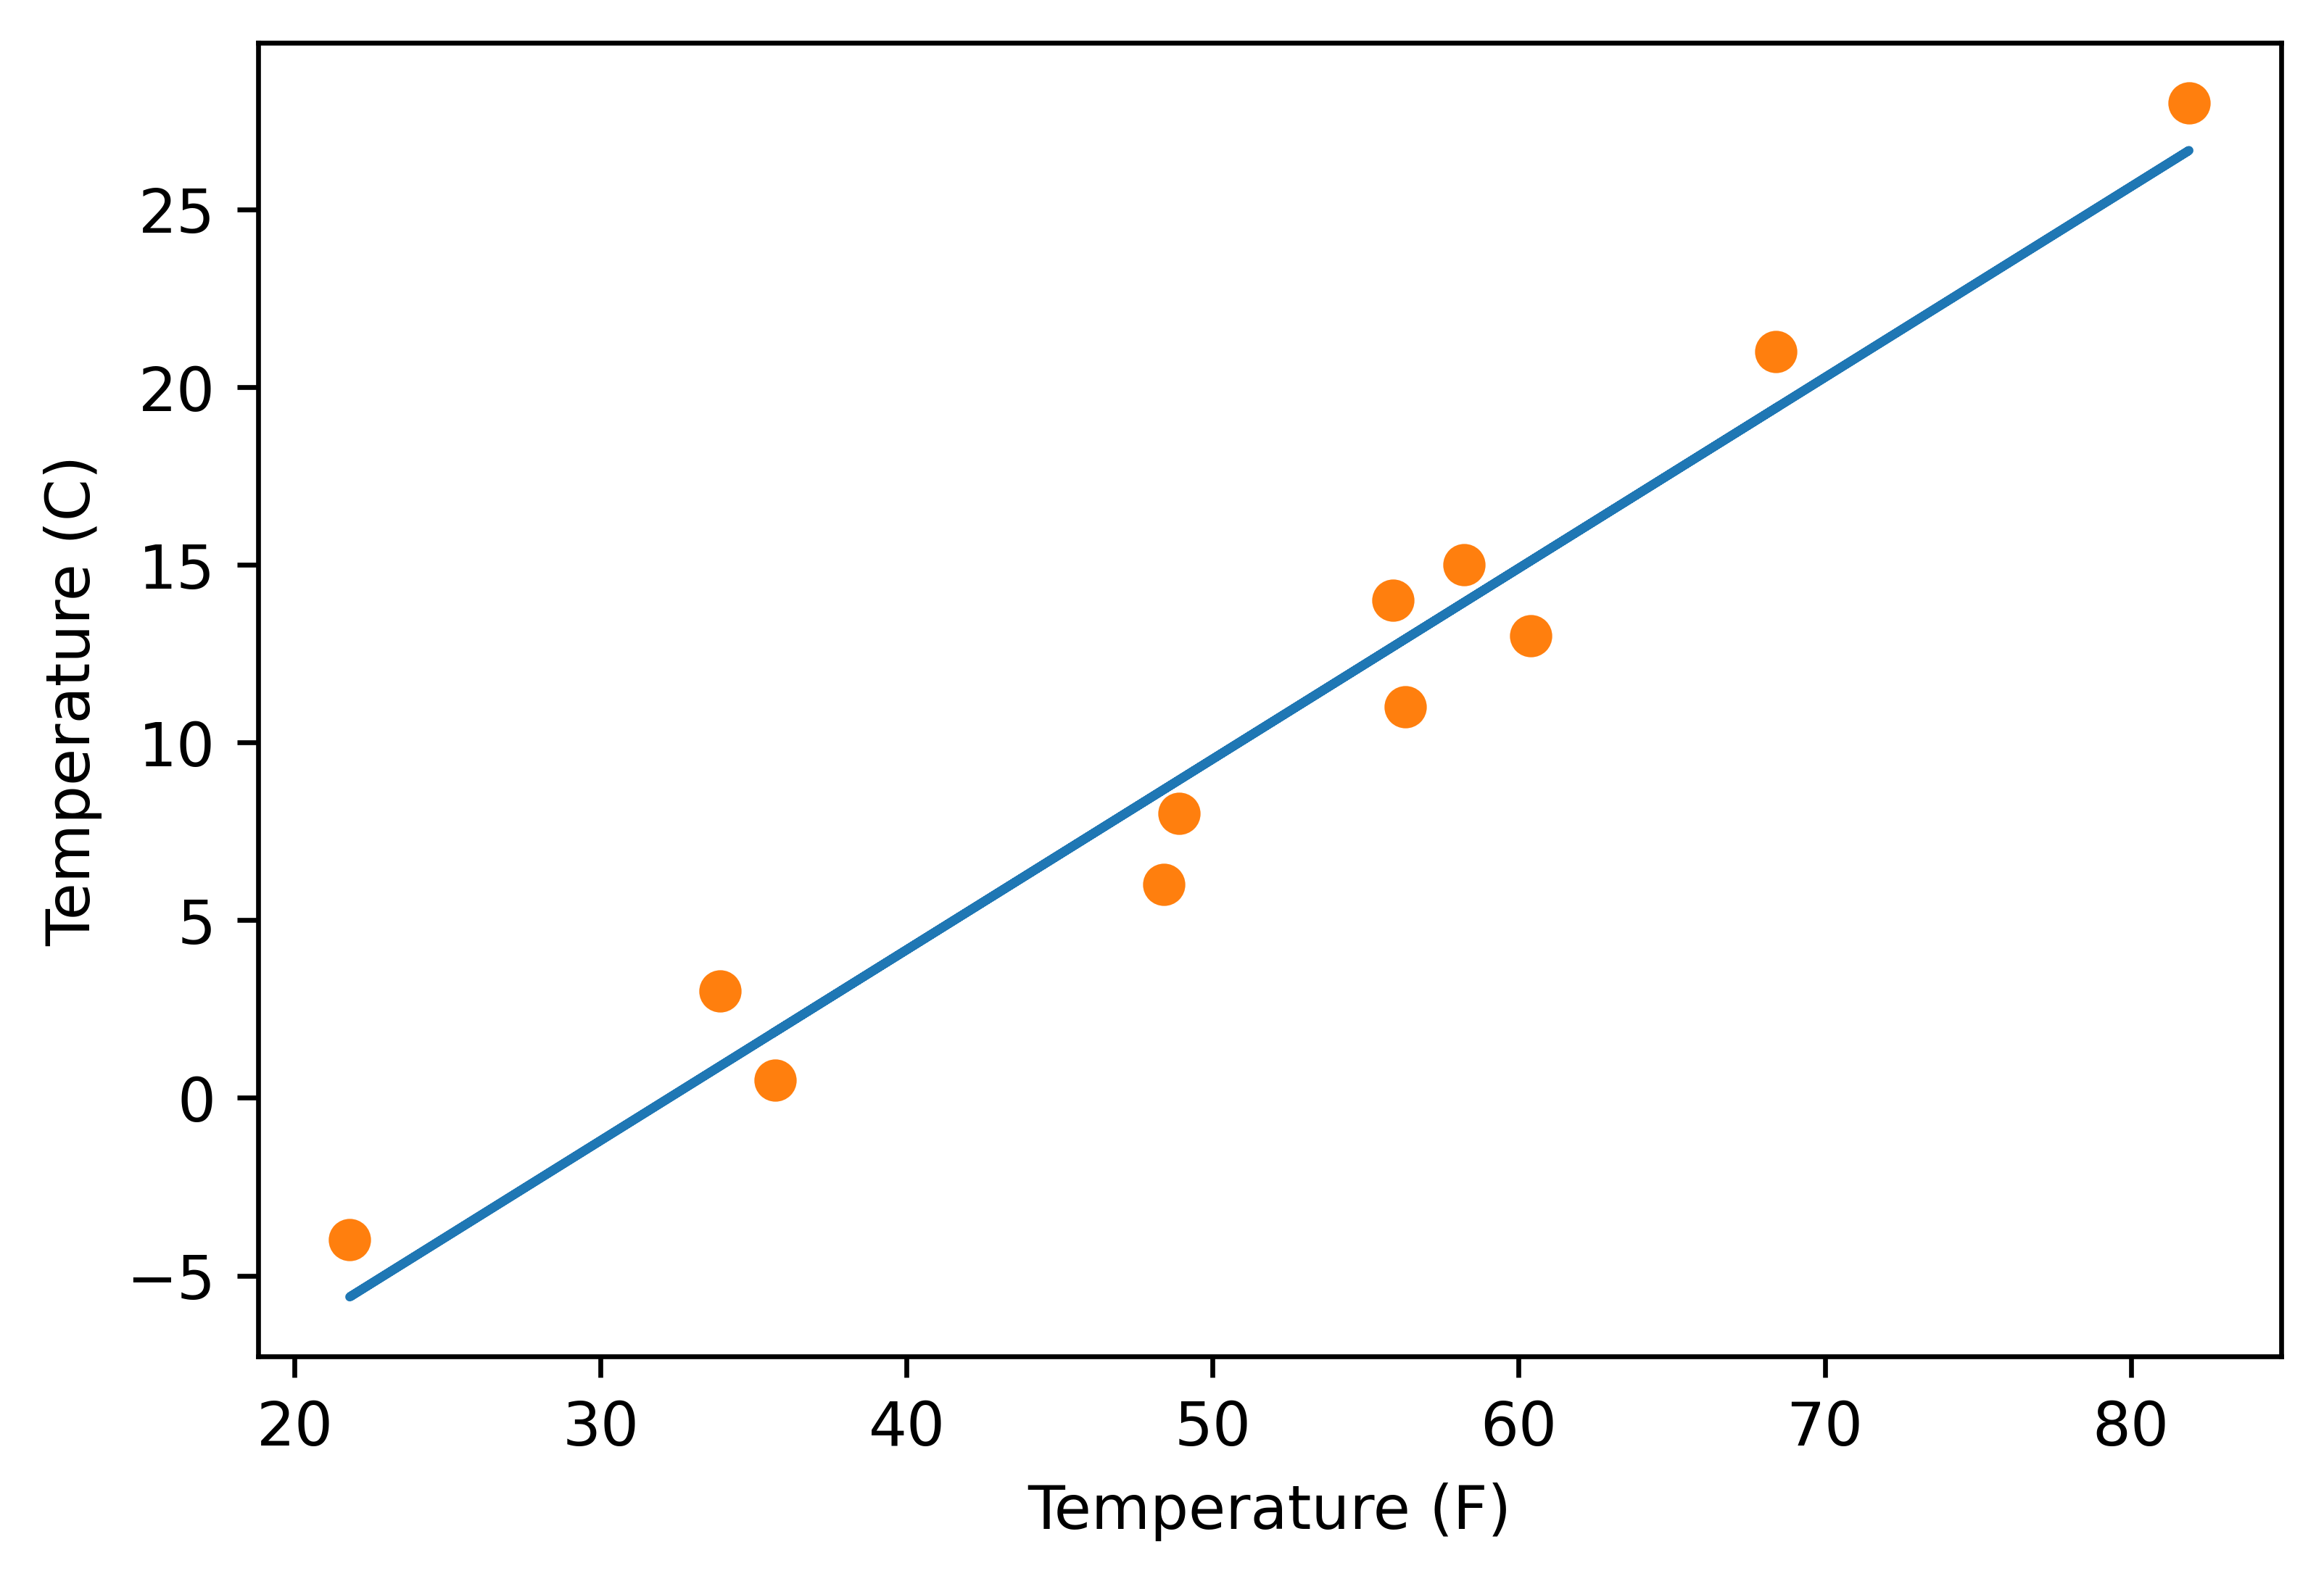

In [100]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (F)")
plt.ylabel("Temperature (C)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), "o")

In [101]:
# start of non-linear model

In [102]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [106]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_u, *params, b)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params

In [108]:
training_loop(
    n_epochs=5000,
    learning_rate = 0.1,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan], requires_grad=True)

In [109]:
training_loop(
    n_epochs=5000,
    learning_rate = 0.01,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan], requires_grad=True)

In [110]:
training_loop(
    n_epochs=5000,
    learning_rate = 0.001,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan], requires_grad=True)

In [111]:
training_loop(
    n_epochs=5000,
    learning_rate = 0.0001,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 520.711975
Epoch 1000, Loss 400.805176
Epoch 1500, Loss 311.571320
Epoch 2000, Loss 245.164017
Epoch 2500, Loss 195.744186
Epoch 3000, Loss 158.965866
Epoch 3500, Loss 131.595764
Epoch 4000, Loss 111.227051
Epoch 4500, Loss 96.068649
Epoch 5000, Loss 84.787910


tensor([-14.8852,   1.5369], requires_grad=True)

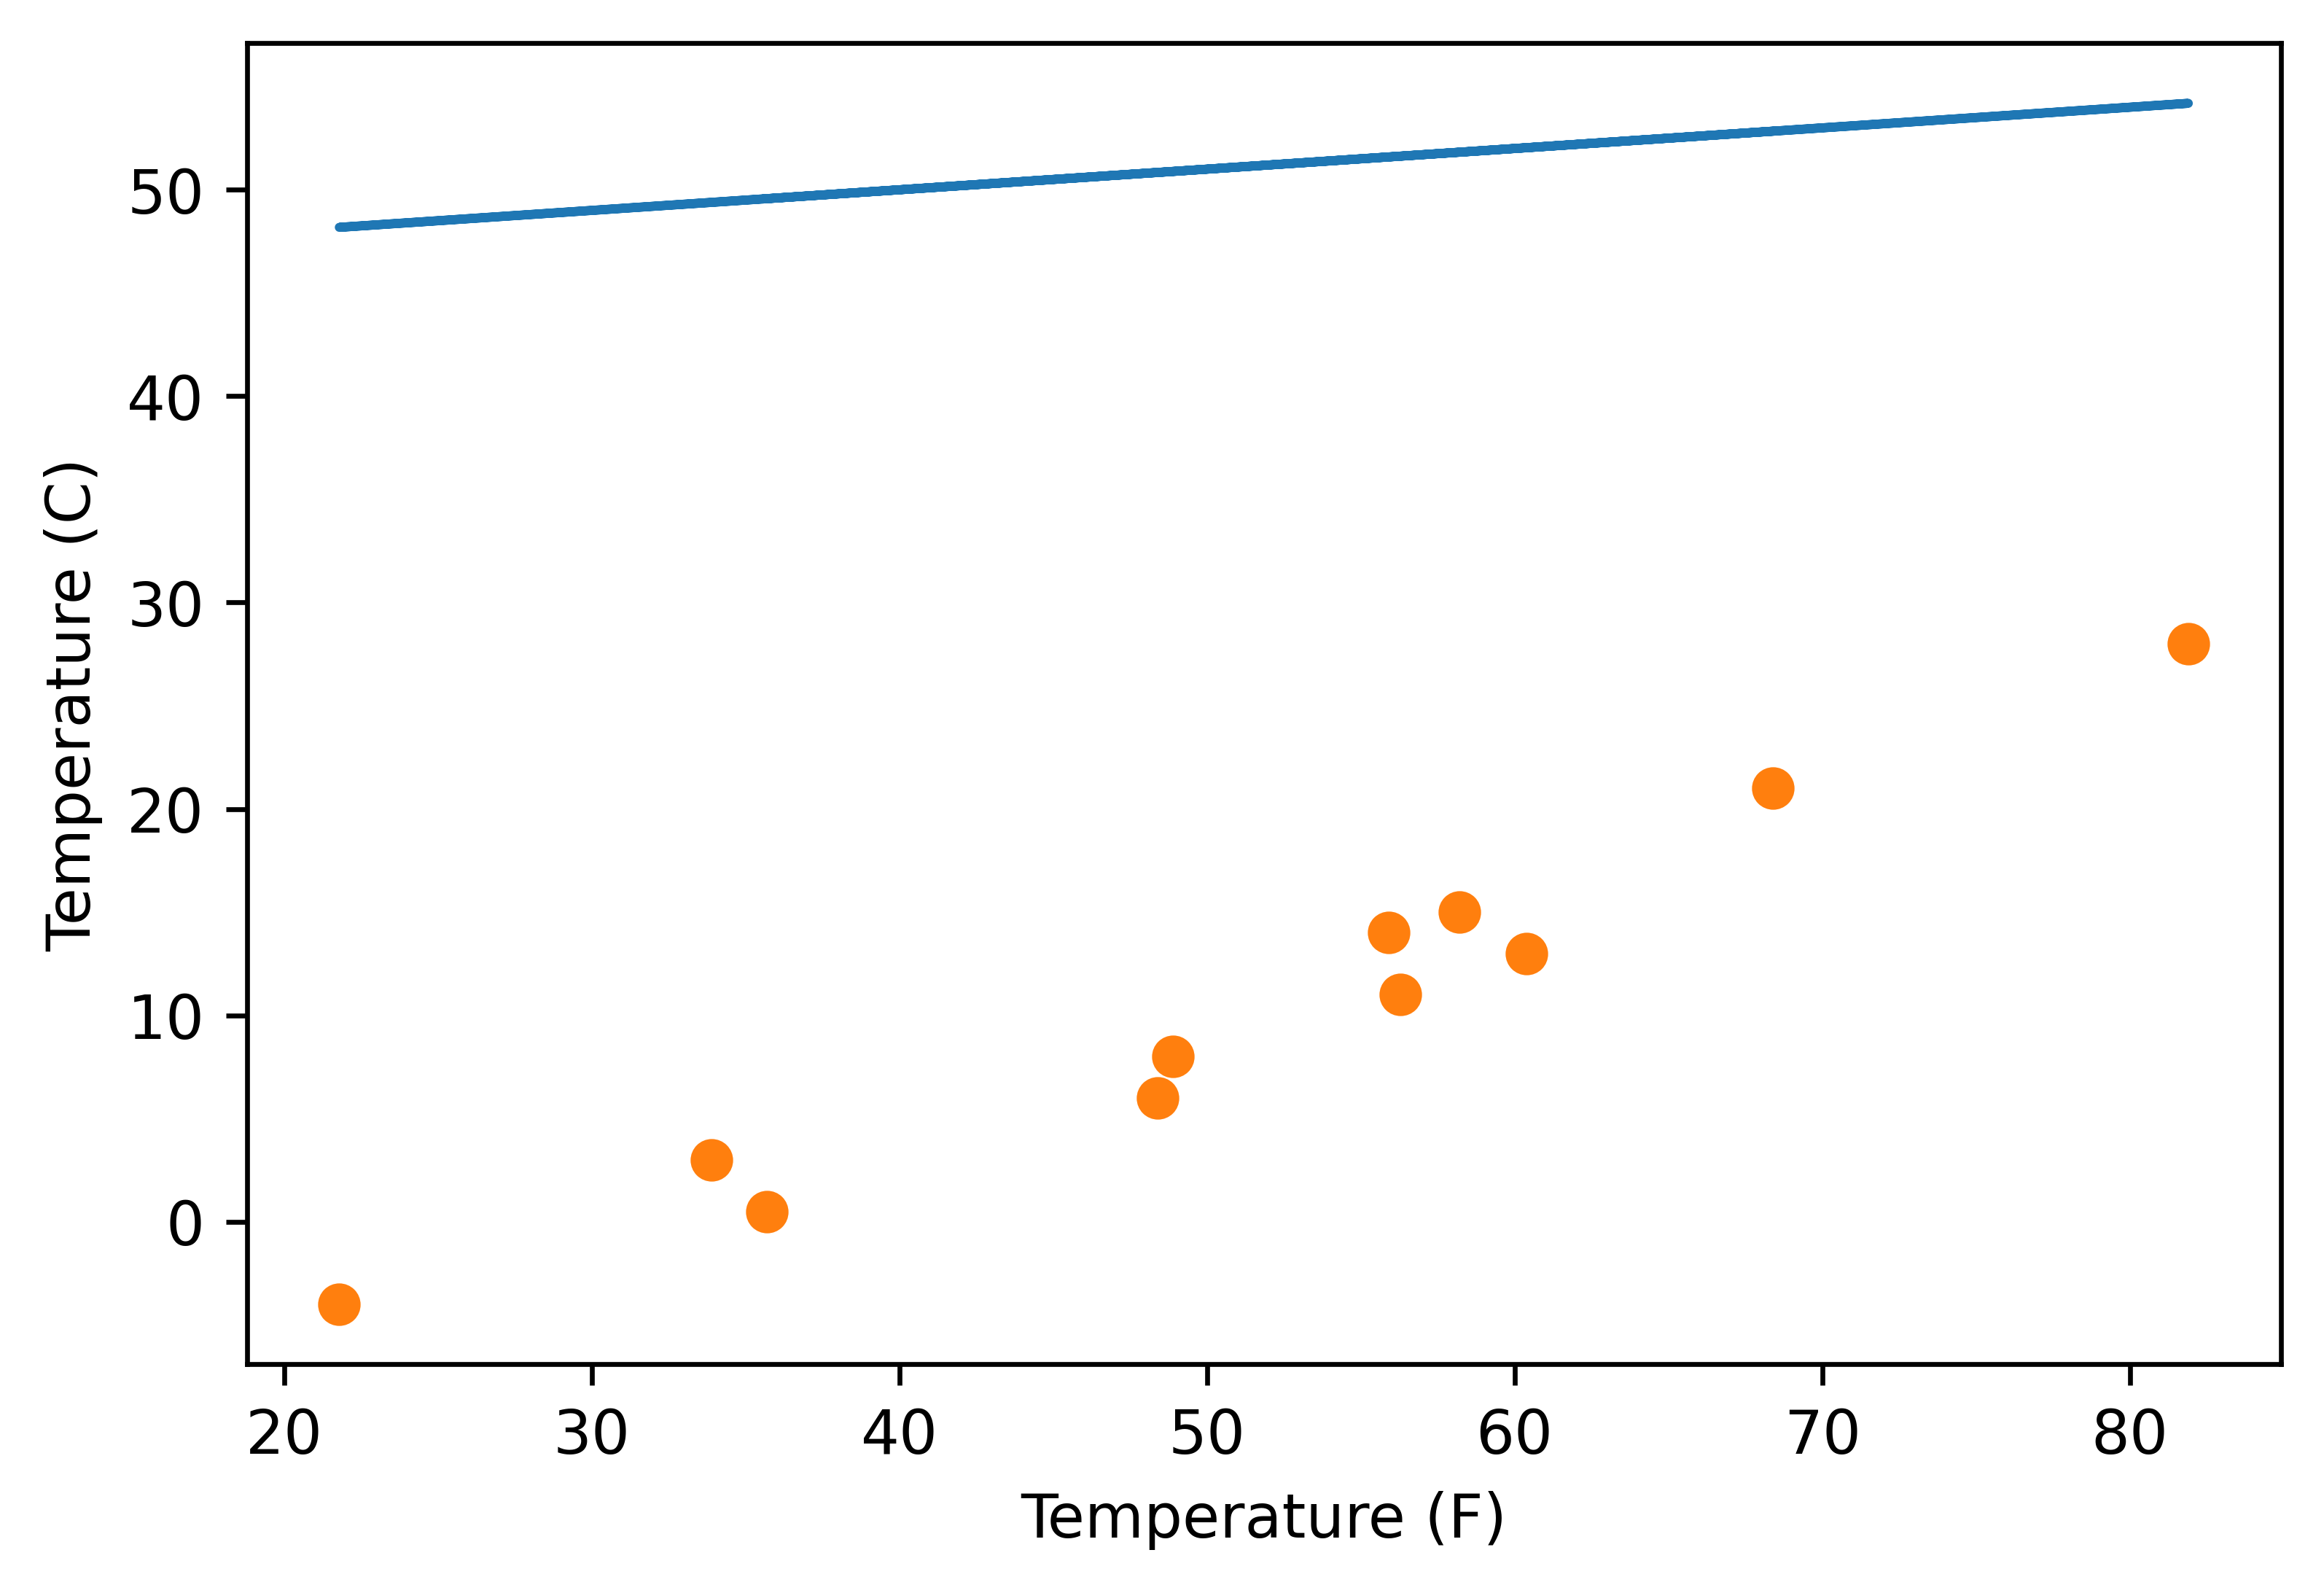

In [113]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params, b)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (F)")
plt.ylabel("Temperature (C)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), "o")

In [114]:
# Problem 3

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [127]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head()
print(type(Newtrain))

<class 'pandas.core.frame.DataFrame'>


In [147]:
def model(x_area, x_bed, x_bath, x_stories, x_park,w5, w4, w3, w2, w1, b):
    return w5*x_area + w4*x_bed + w3*x_bath + w2*x_stories + w1*x_park + b

In [148]:
# Reusing other functions from problem 2

In [157]:
# t_u is the input vars, t_c is the output vars
#input_array = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
output_array = Newtrain["price"].to_numpy()

t_area = torch.tensor(Newtrain["area"].to_numpy())
t_bedrooms = torch.tensor(Newtrain["bedrooms"].to_numpy())
t_bathrooms = torch.tensor(Newtrain["bathrooms"].to_numpy())
t_stories = torch.tensor(Newtrain["stories"].to_numpy())
t_parking = torch.tensor(Newtrain["parking"].to_numpy())
t_cost = torch.tensor(output_array)

tn_area = t_area * 0.1
tn_bedrooms = t_bedrooms * 0.1
tn_bathrooms = t_bathrooms * 0.1
tn_stories = t_stories * 0.1
tn_parking = t_parking * 0.1
tn_area = t_area * 0.1


In [158]:
w5 = torch.ones(())
w4 = torch.ones(())
w3 = torch.ones(())
w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())
t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w5, w4, w3, w2, w1, b)
t_p

tensor([ 7431.,  8975.,  9969.,  7511.,  7429.,  7509.,  8593., 16210.,  8109.,
         5760., 13208.,  6011.,  6559.,  3510.,  7807.,  6009.,  6609.,  8511.,
         4609.,  6428.,  4328.,  7163.,  8056.,  4568.,  8809.,  6550.,  6009.,
         8881.,  7961.,  5509.,  7486.,  7010.,  4889.,  5969.,  6849.,  7011.,
         7491.,  9012.,  6010.,  6011.,  6556.,  6369.,  6491.,  6012.,  6011.,
         6008.,  6010.,  6611.,  4308.,  7446.,  7450.,  6334.,  6011.,  5161.,
         6008.,  6007., 11448.,  9011.,  7691.,  6010.,  6008.,  8885.,  6249.,
         6371., 11181.,  8888., 13205.,  7708.,  6006., 12100.,  4007.,  6010.,
         5028.,  6608.,  4047.,  4268.,  6428.,  6508.,  5707.,  6008.,  6007.,
         4008., 10507.,  6009.,  3768.,  8258.,  6677.,  3967.,  7417.,  8592.,
         5006.,  6756.,  4809.,  7209.,  6011.,  4110.,  9006.,  6406.,  6608.,
         6008.,  6606.,  5508.,  5510.,  6358.,  5508.,  4508.,  5457.,  6427.,
         3249.,  6624.,  6607.,  8381., 

In [159]:
loss = loss_fn(t_p, t_c)
loss

tensor(2.6160e+13)

In [172]:
def training_loop(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params)
        loss = loss_fn(t_p, t_cost)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params

In [173]:
params = training_loop(
    n_epochs=5000,
    learning_rate = 0.000001,
    params = torch.tensor([1.0,1.0, 1.0, 1.0,1.0, 0.0], requires_grad=True),
    t_area = tn_area,
    t_bedrooms = tn_bedrooms,
    t_bathrooms = tn_bathrooms,
    t_stories = tn_stories,
    t_parking = tn_parking
)

Epoch 500, Loss 3346414174208.000000
Epoch 1000, Loss 3346076794880.000000
Epoch 1500, Loss 3345739153408.000000
Epoch 2000, Loss 3345401774080.000000
Epoch 2500, Loss 3345065181184.000000
Epoch 3000, Loss 3344728064000.000000
Epoch 3500, Loss 3344390946816.000000
Epoch 4000, Loss 3344054353920.000000
Epoch 4500, Loss 3343717761024.000000
Epoch 5000, Loss 3343381430272.000000


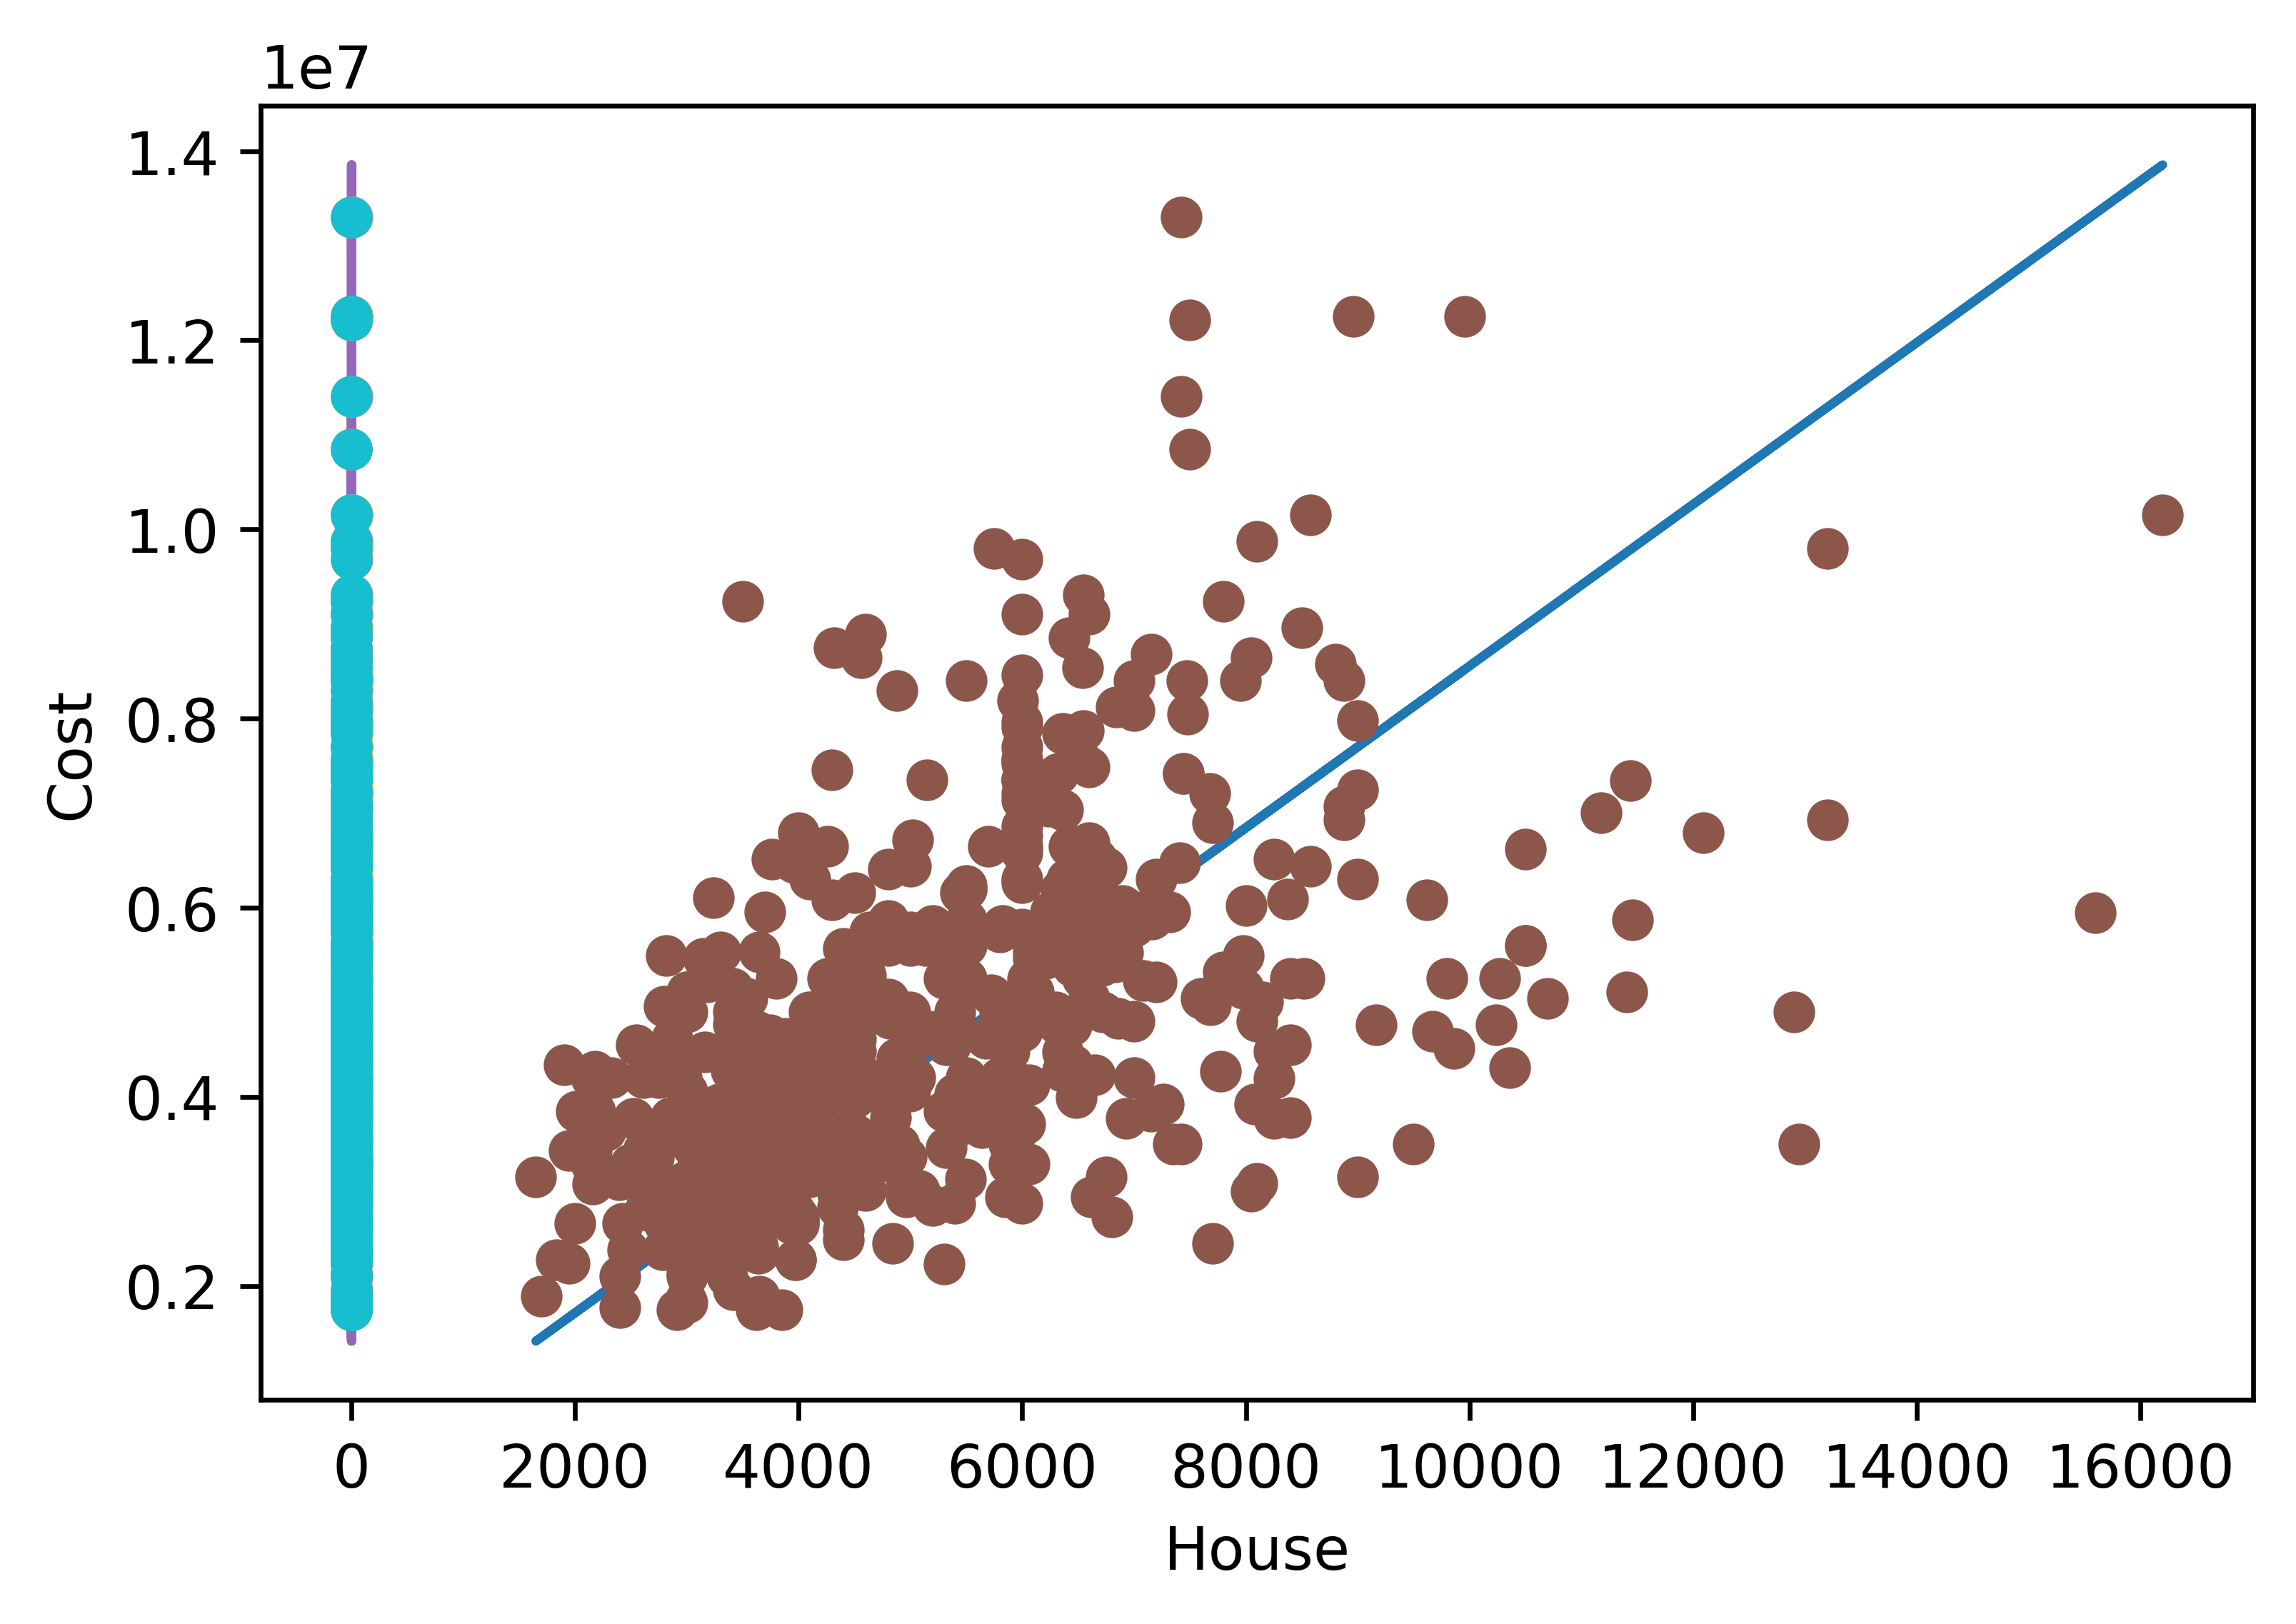

In [174]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(tn_area, tn_bedrooms, tn_bathrooms, tn_stories, tn_parking, *params)

fig = plt.figure(dpi=600)
plt.xlabel("House")
plt.ylabel("Cost")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), "o")